## **Python Implementation:**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
df.shape

(489, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [ ]:
X = df.drop(columns ="MEDV")
y = df["MEDV"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [ ]:
X_train

,RM,LSTAT,PTRATIO
400,5.304,26.64,20.2
3,6.998,2.94,18.7
341,5.884,7.79,18.3
446,6.513,10.29,20.2
60,5.741,13.15,19.7
...,...,...,...
106,5.836,18.66,20.9
270,7.820,3.76,14.9
348,6.112,12.67,20.2
435,6.297,17.27,20.2


In [ ]:
X_test

,RM,LSTAT,PTRATIO
451,5.926,18.13,20.2
84,6.389,9.62,18.5
434,6.655,17.73,20.2
472,5.414,23.97,20.1
428,6.459,23.98,20.2
...,...,...,...
5,6.430,5.21,18.7
116,6.176,12.04,17.8
45,5.682,10.21,17.9
16,5.935,6.58,21.0


In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([344506.48759061, 506327.27976616, 415353.17017023, 239962.0638801 ,
       333649.61312595, 401230.97912683, 264056.48923987, 704358.32553736,
       361900.16646324, 585599.74279969, 458070.5138275 , 366913.20262379,
       268670.15468047, 267718.35118014, 392280.21702029, 525044.97389849,
       391510.78781294, 368227.37572129, 371107.26023188, 421832.76471511,
       460366.51655741, 462133.34241751, 374289.39760319, 645665.29334293,
       468445.23405715, 473055.42999718, 499307.03253566, 633910.24603752,
       679721.90733453, 174088.88854258, 516081.33085896, 243811.15979967,
       535382.7619211 , 507220.40788046, 306309.22993104, 500927.76305976,
       632077.16476245, 497596.04830371, 666055.63413931, 640385.20672343,
       420649.21237257, 410835.73427035, 321338.18831028, 454006.4471657 ,
       390447.49953726, 580770.60217368, 351805.33816739, 393689.82082646,
       411701.07841305, 392707.53395954, 280177.89601337, 583092.8579051 ,
       569964.54038377, 4

In [ ]:
my_dict = {"Actual": y_test, "Predicted": y_pred, "Error":y_test-y_pred}

In [ ]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Predicted,Error
451,401100.0,344506.487591,56593.512409
84,501900.0,506327.279766,-4427.279766
434,319200.0,415353.170170,-96153.170170
472,147000.0,239962.063880,-92962.063880
428,247800.0,333649.613126,-85849.613126
...,...,...,...
5,602700.0,551229.614629,51470.385371
116,445200.0,475562.294919,-30362.294919
45,405300.0,447067.081751,-41767.081751
16,485100.0,447799.381001,37300.618999


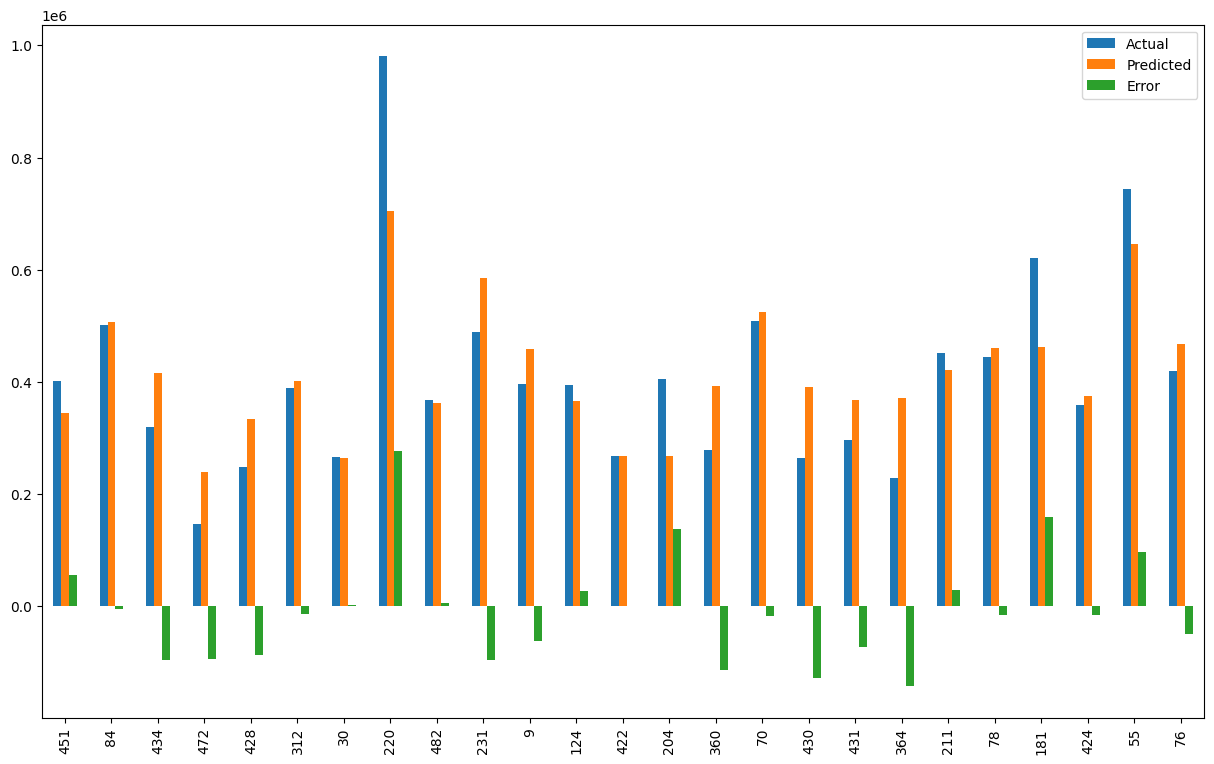

In [ ]:
comparing.head(25).plot(kind ="bar", figsize=(15,9))
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
R2_score=r2_score(y_test,y_pred)
R2_score

0.6910052678184769

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

63313.49737234147

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

83953.67341705596

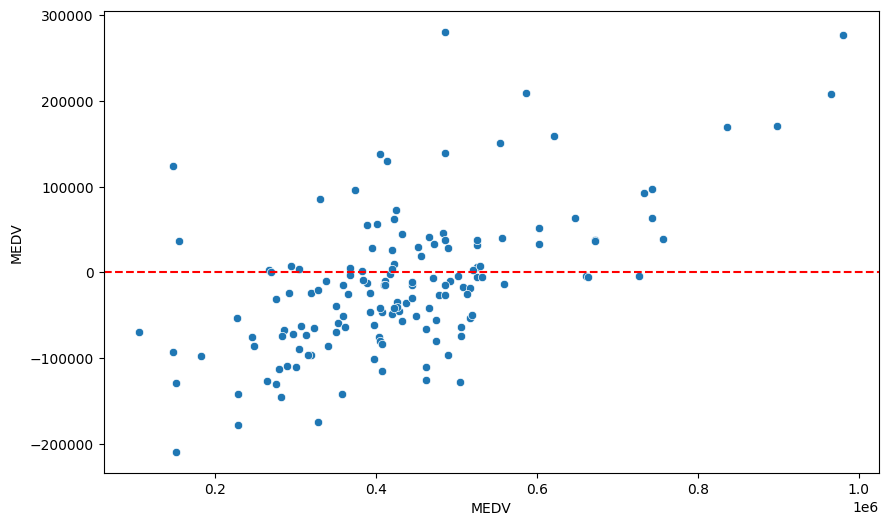

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = y_test-y_pred)
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.show()

## **R Implementation:**

In [2]:
library(readr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
df <- read_csv('/content/housing.csv')
head(df)

Rows: 489 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): RM, LSTAT, PTRATIO, MEDV

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


RM,LSTAT,PTRATIO,MEDV
<dbl>,<dbl>,<dbl>,<dbl>
6.575,4.98,15.3,504000
6.421,9.14,17.8,453600
7.185,4.03,17.8,728700
6.998,2.94,18.7,701400
7.147,5.33,18.7,760200
6.430,5.21,18.7,602700


In [4]:
dim(df)

[1] 489   4

In [5]:
str(df)

spc_tbl_ [489 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ RM     : num [1:489] 6.58 6.42 7.18 7 7.15 ...
 $ LSTAT  : num [1:489] 4.98 9.14 4.03 2.94 5.33 ...
 $ PTRATIO: num [1:489] 15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ MEDV   : num [1:489] 504000 453600 728700 701400 760200 ...
 - attr(*, "spec")=
  .. cols(
  ..   RM = col_double(),
  ..   LSTAT = col_double(),
  ..   PTRATIO = col_double(),
  ..   MEDV = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [6]:
summary(df)

       RM            LSTAT          PTRATIO           MEDV        
 Min.   :3.561   Min.   : 1.98   Min.   :12.60   Min.   : 105000  
 1st Qu.:5.880   1st Qu.: 7.37   1st Qu.:17.40   1st Qu.: 350700  
 Median :6.185   Median :11.69   Median :19.10   Median : 438900  
 Mean   :6.240   Mean   :12.94   Mean   :18.52   Mean   : 454343  
 3rd Qu.:6.575   3rd Qu.:17.12   3rd Qu.:20.20   3rd Qu.: 518700  
 Max.   :8.398   Max.   :37.97   Max.   :22.00   Max.   :1024800  

In [7]:
y <- df$MEDV
x <- df %>%
  select(-MEDV)


In [ ]:
# prompt: Do train test split on x and y
install.packages("caret")
library(caret)
set.seed(42)
index <- createDataPartition(y, p = 0.7, list = FALSE)
x_train <- x[index,]
x_test <- x[-index,]
y_train <- y[index,]
y_test <- y[-index,]


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘clock’, ‘ipred’, ‘recipes’




In [ ]:
model <- lm(x_train ~ ., data = y_train)
summary(model)


In [ ]:
y_pred <- predict(model, y_test)
y_pred


In [ ]:
my_dict <- data.frame(Actual = y_test, Predicted = y_pred, Error = y_test - y_pred)


In [ ]:
comparing <- data.frame(my_dict)
comparing
